In [2]:
import pandas as pd
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Dataset

In [4]:
data = pd.read_csv('Exasens.csv')
data.head()

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2,NaN,NaN,Male=1,Non-smoker=1
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2,NaN,NaN,Female=0,Ex-smoker=2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3,NaN,NaN,NaN,Active-smoker=3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2,NaN,NaN,NaN,NaN
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2,NaN,NaN,NaN,NaN


In [5]:
data = data.drop(["Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","ID"],axis=1)

In [6]:
data.rename(columns={'Unnamed: 3':'Imaginary Part Avg','Unnamed: 5':'Real Part Avg'}, inplace=True)

### Cek Missing Value

In [7]:
data.isnull().sum()

Diagnosis               0
Imaginary Part        299
Imaginary Part Avg    299
Real Part             299
Real Part Avg         299
Gender                  0
Age                     0
Smoking                 0
dtype: int64

### Replace Missing value

In [8]:
data['Imaginary Part'] = data['Imaginary Part'].fillna(data['Imaginary Part'].mean())
data['Imaginary Part Avg'] = data['Imaginary Part Avg'].fillna(data['Imaginary Part'].mean())
data['Real Part'] = data['Real Part'].fillna(data['Real Part Avg'].mean())
data['Real Part Avg'] = data['Real Part Avg'].fillna(data['Real Part Avg'].mean())

### Label Encoder

In [9]:
labelencoder = LabelEncoder()
data['Diagnosis'] = labelencoder.fit_transform(data['Diagnosis'])
data

,Diagnosis,Imaginary Part,Imaginary Part Avg,Real Part,Real Part Avg,Gender,Age,Smoking
0,1,-320.6100,-300.563531,-495.260000,-464.171991,1,77,2
1,1,-325.3900,-314.750360,-473.730000,-469.263140,0,72,2
2,1,-323.0000,-317.436056,-476.120000,-471.897667,1,73,3
3,1,-327.7800,-317.399670,-473.730000,-468.856388,1,76,2
4,1,-325.3900,-316.155785,-478.520000,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...
394,3,-314.9418,-314.941800,-458.701666,-458.701666,0,49,2
395,3,-314.9418,-314.941800,-458.701666,-458.701666,0,37,1
396,3,-314.9418,-314.941800,-458.701666,-458.701666,0,29,1
397,3,-314.9418,-314.941800,-458.701666,-458.701666,1,51,1


### Korelasi Antar Variable

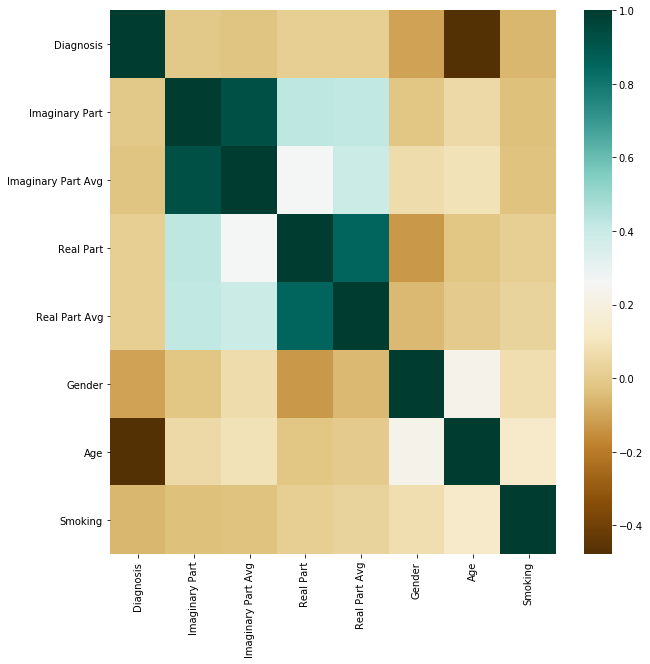

In [10]:
plt.figure(figsize=(10,10))
c = data.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

### Pemilihan Variabel

In [11]:
df = pd.concat([data['Imaginary Part'], data['Real Part']], axis=1)
df

,Imaginary Part,Real Part
0,-320.6100,-495.260000
1,-325.3900,-473.730000
2,-323.0000,-476.120000
3,-327.7800,-473.730000
4,-325.3900,-478.520000
...,...,...
394,-314.9418,-458.701666
395,-314.9418,-458.701666
396,-314.9418,-458.701666
397,-314.9418,-458.701666


### Menentukan jumlah n cluster

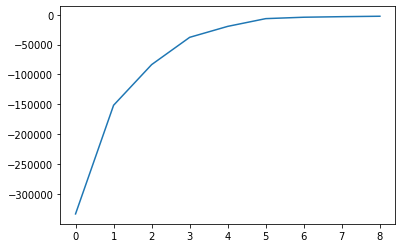

In [12]:
scr = []
for i in range(1,10):
    score = KMeans(n_clusters=i).fit(df).score(df)
    #print(score)
    scr.append(score)
    
plt.plot(scr)

### Mengubah variabel data frame menjadi array

In [13]:
x_array = np.array(df)
print(x_array)

[[-320.61      -495.26     ]
 [-325.39      -473.73     ]
 [-323.        -476.12     ]
 [-327.78      -473.73     ]
 [-325.39      -478.52     ]
 [-327.78      -507.23     ]
 [-330.18      -473.73     ]
 [-314.9418    -458.7016663]
 [-320.61      -476.12     ]
 [-315.82      -473.73     ]
 [-320.61      -471.34     ]
 [-318.21      -471.34     ]
 [-315.82      -471.34     ]
 [-313.43      -521.58     ]
 [-311.04      -466.55     ]
 [-314.9418    -458.7016663]
 [-314.9418    -458.7016663]
 [-323.        -466.55     ]
 [-308.64      -468.95     ]
 [-325.39      -473.73     ]
 [-323.        -502.44     ]
 [-228.        -442.       ]
 [-225.        -443.       ]
 [-314.9418    -458.7016663]
 [-325.39      -471.34     ]
 [-323.        -504.83     ]
 [-323.        -468.95     ]
 [-325.39      -473.73     ]
 [-330.18      -471.34     ]
 [-314.9418    -458.7016663]
 [-314.9418    -458.7016663]
 [-231.        -441.       ]
 [-228.        -442.       ]
 [-337.35      -476.12     ]
 [-314.9418   

### Standarisasi ukuran array

In [14]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.14899866, 0.22578321],
       [0.10645305, 0.26272175],
       [0.12772586, 0.25862128],
       [0.08518024, 0.26272175],
       [0.10645305, 0.25450365],
       [0.08518024, 0.20524654],
       [0.06381842, 0.26272175],
       [0.19944993, 0.28850553],
       [0.14899866, 0.25862128],
       [0.19163329, 0.26272175],
       [0.14899866, 0.26682222],
       [0.17036048, 0.26682222],
       [0.19163329, 0.26682222],
       [0.2129061 , 0.18062657],
       [0.23417891, 0.27504032],
       [0.19944993, 0.28850553],
       [0.19944993, 0.28850553],
       [0.12772586, 0.27504032],
       [0.25554072, 0.27092269],
       [0.10645305, 0.26272175],
       [0.12772586, 0.21346464],
       [0.97329773, 0.31716021],
       [1.        , 0.31544453],
       [0.19944993, 0.28850553],
       [0.10645305, 0.26682222],
       [0.12772586, 0.20936417],
       [0.12772586, 0.27092269],
       [0.10645305, 0.26272175],
       [0.06381842, 0.26682222],
       [0.19944993, 0.28850553],
       [0.

### Konfigurasi fungsi K-Means

In [31]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.10374226 0.25191276]
 [0.93858478 0.38235597]
 [0.19999689 0.2868888 ]]


### Tambahkan kolom kluster kedalam data frame

In [32]:
print(kmeans.labels_)
df["kluster"] = kmeans.labels_
df.head()


[0 0 0 0 0 0 0 2 0 2 0 2 2 2 2 2 2 0 2 0 0 1 1 2 0 0 0 0 0 2 2 1 1 0 2 1 2
 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0 2
 2 0 0 0 0 0 2 1 2 2 0 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 0 0 2 2 0 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,Imaginary Part,Real Part,kluster
0,-320.61,-495.26,0
1,-325.39,-473.73,0
2,-323.00,-476.12,0
3,-327.78,-473.73,0
4,-325.39,-478.52,0


In [33]:
df['kluster'].value_counts()

2    310
0     79
1     10
Name: kluster, dtype: int64

### Visualisasi Data

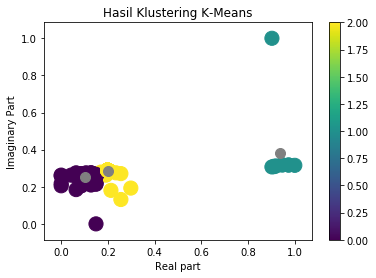

In [34]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 200, c =df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='grey', s=100, alpha=1 , marker="o");
plt.title('Hasil Klustering K-Means')
plt.xlabel("Real part")
plt.ylabel("Imaginary Part")
plt.colorbar(output)
plt.show()

(array([389.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

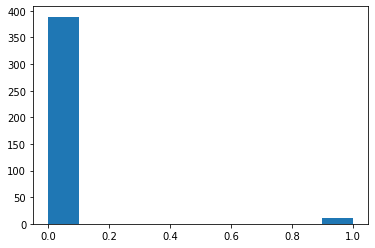

In [19]:
plt.hist(df['kluster'])